In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)

# Hyper Parameters
INPUT_SIZE = 1
LR = 0.02

In [3]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.RNN(
            input_size = 1,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True,
        )
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [4]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [5]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()

30


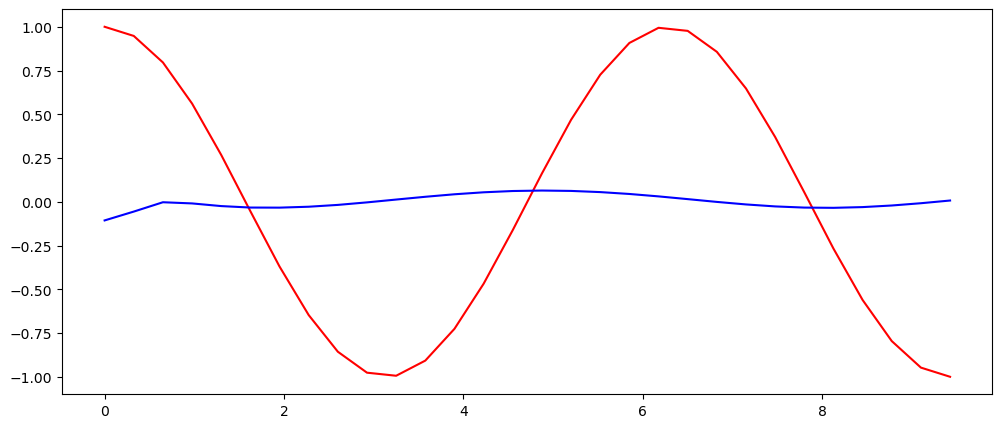

20


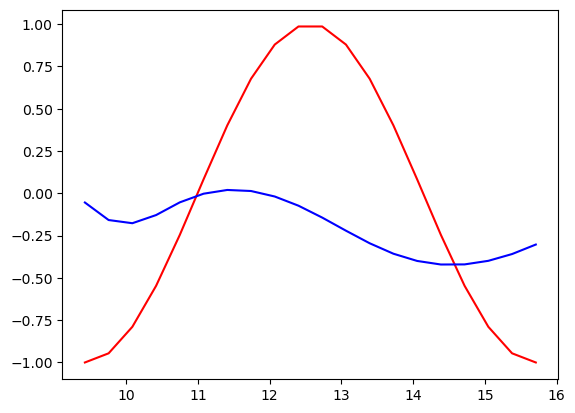

20


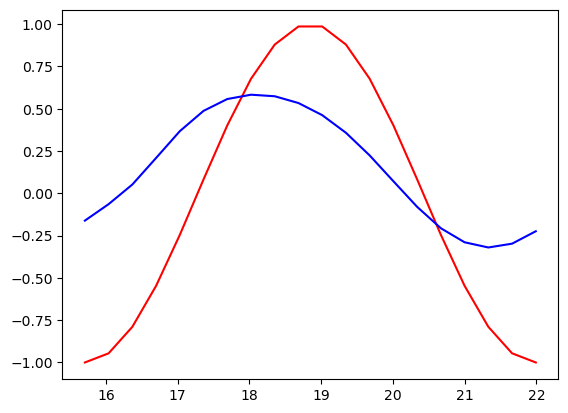

20


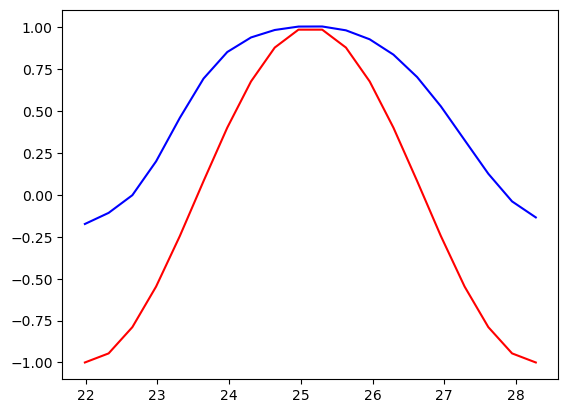

30


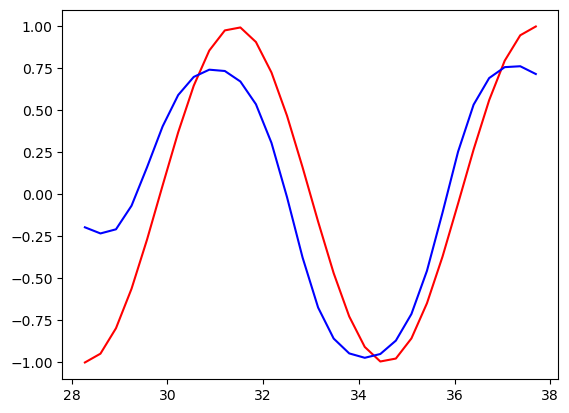

20


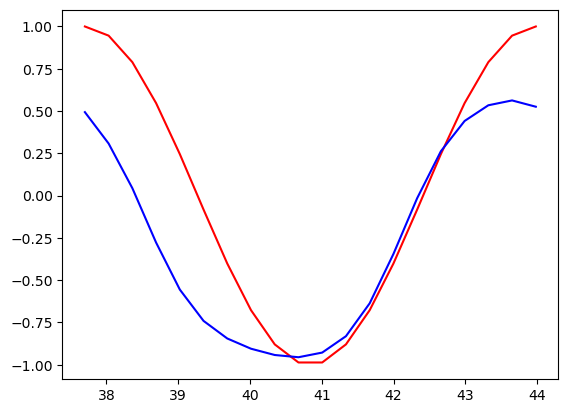

30


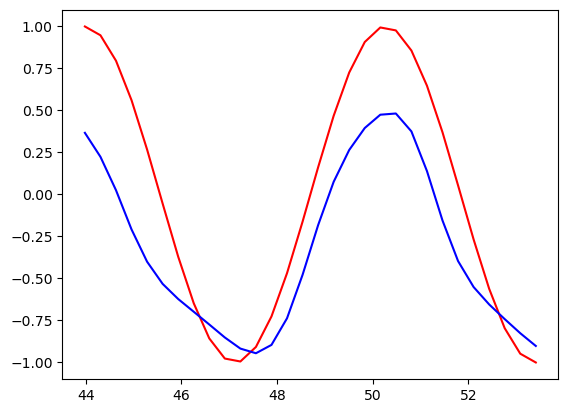

10


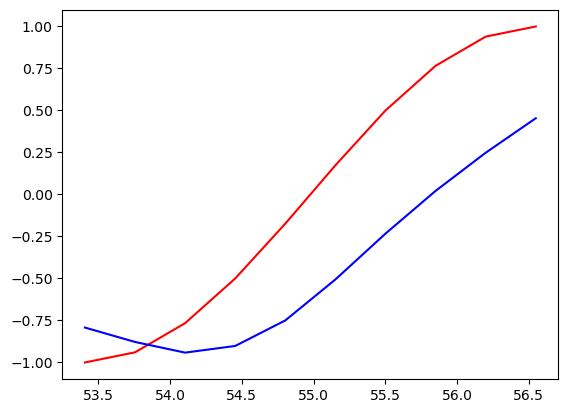

10


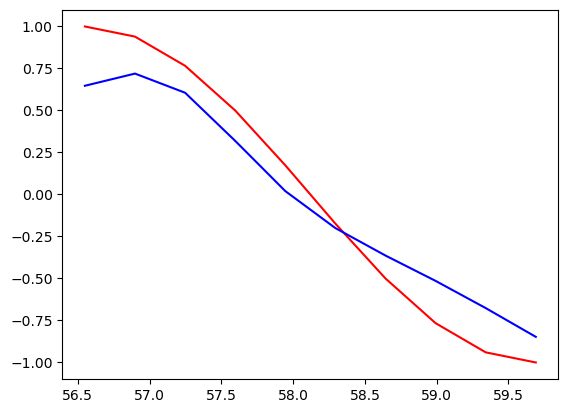

20


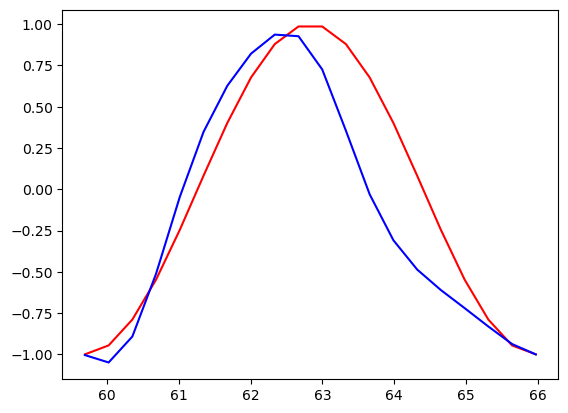

30


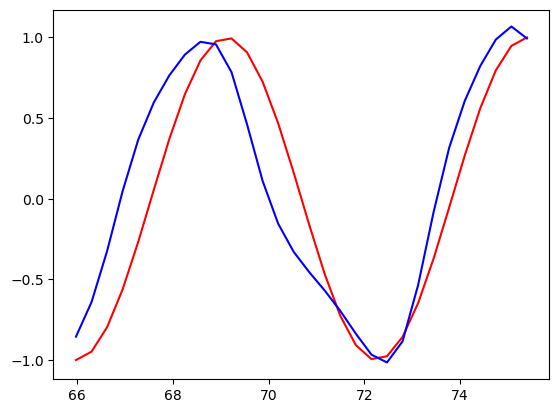

30


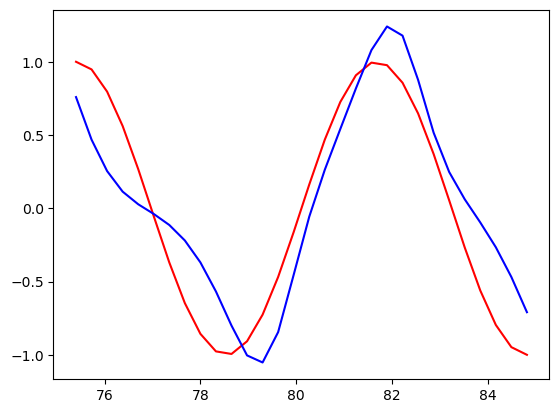

30


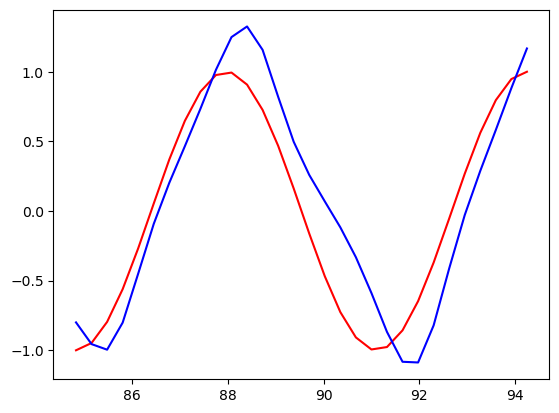

30


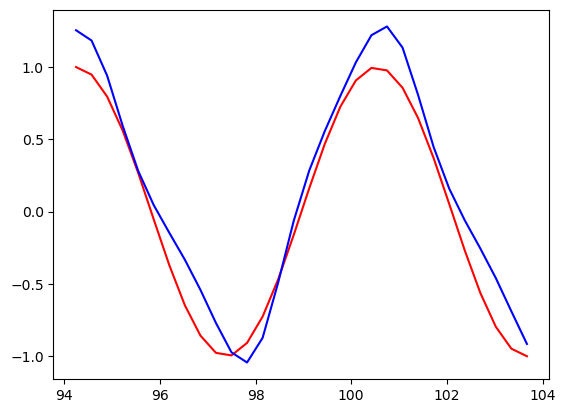

10


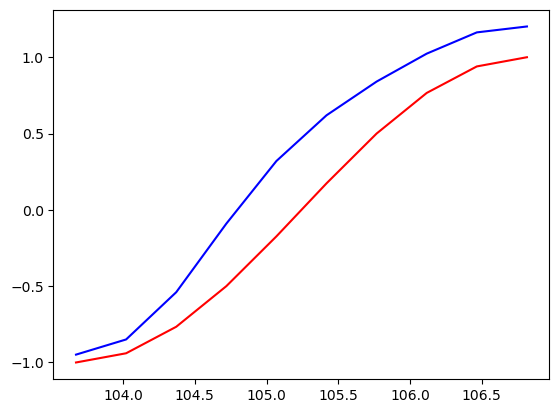

10


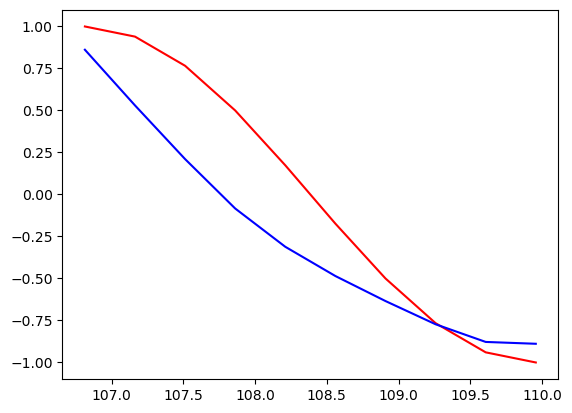

20


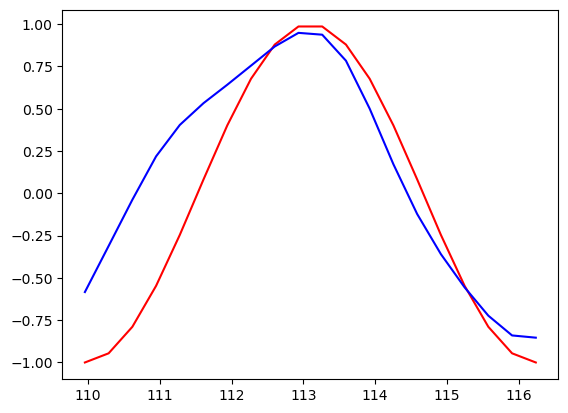

30


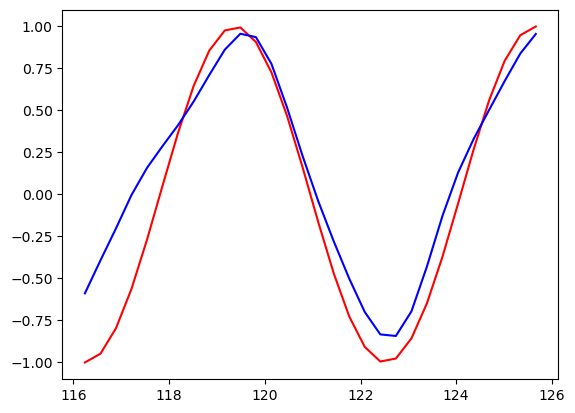

20


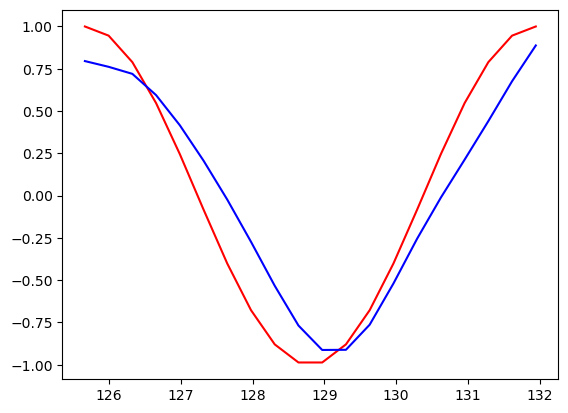

20


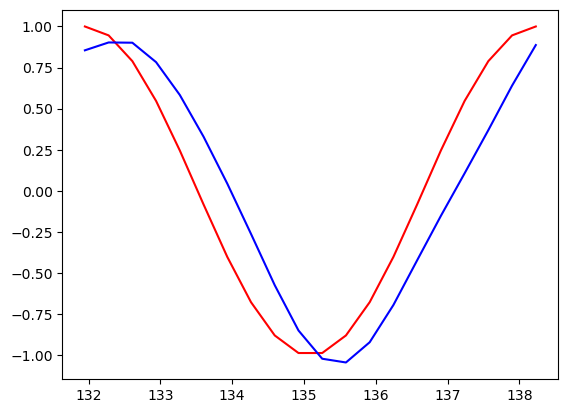

30


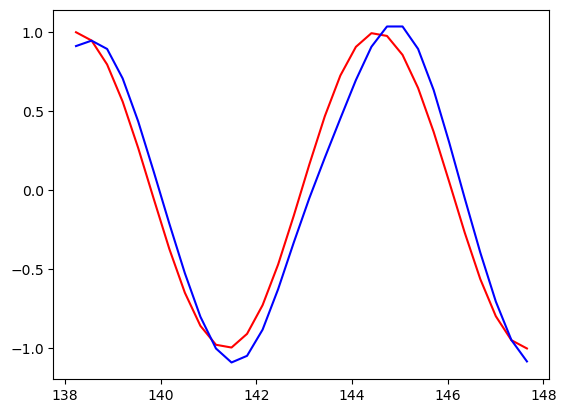

30


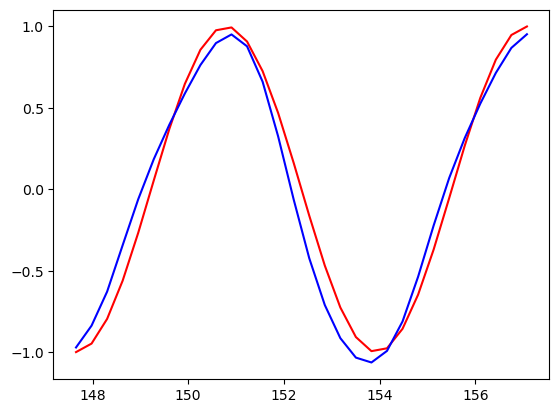

20


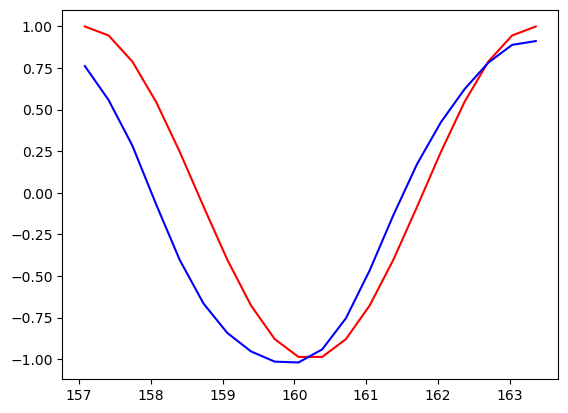

20


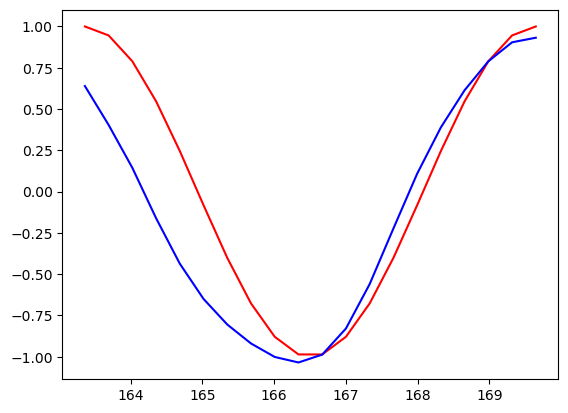

20


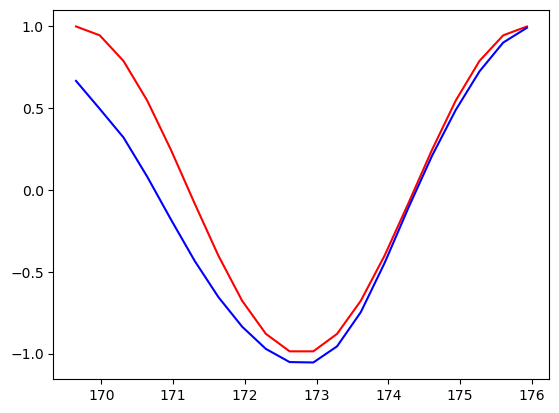

30


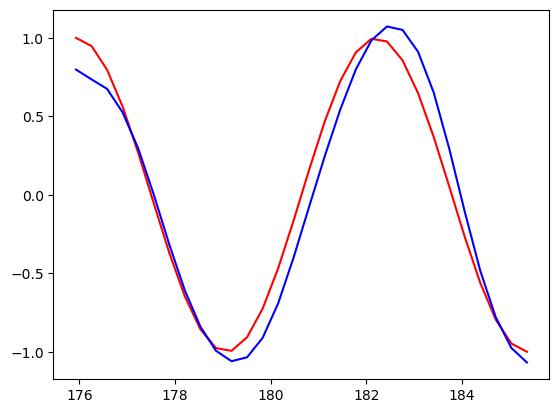

30


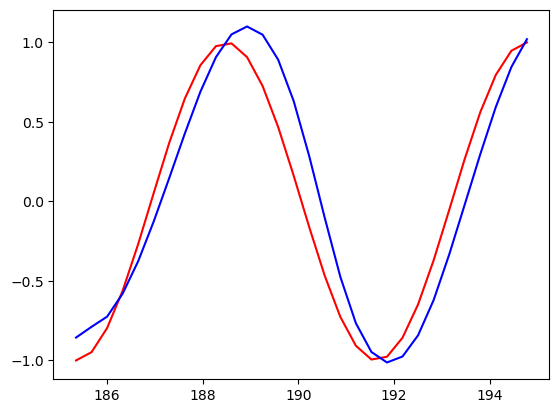

20


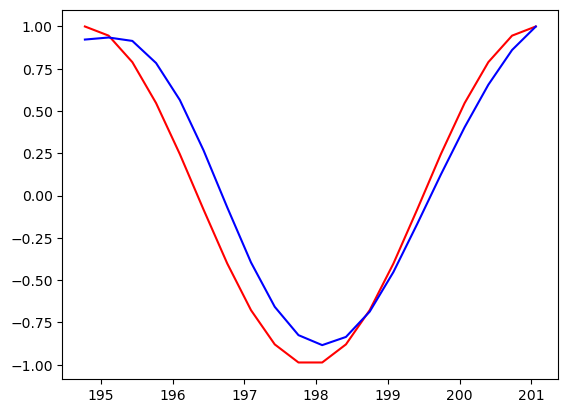

20


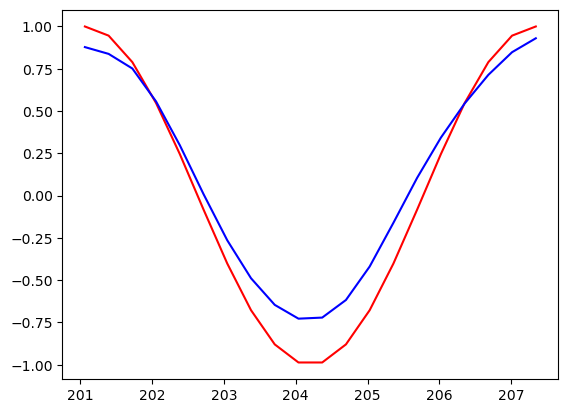

20


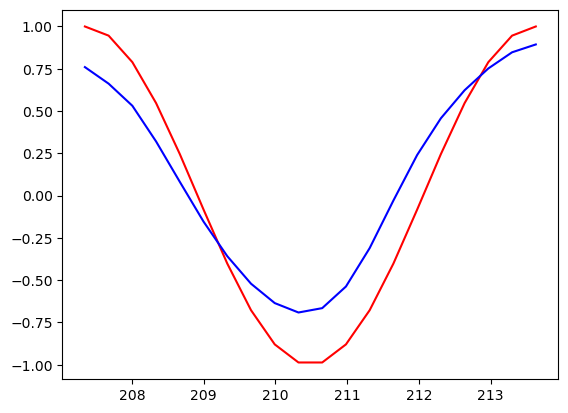

30


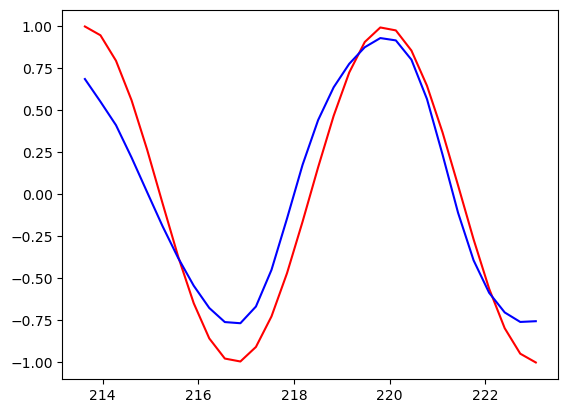

10


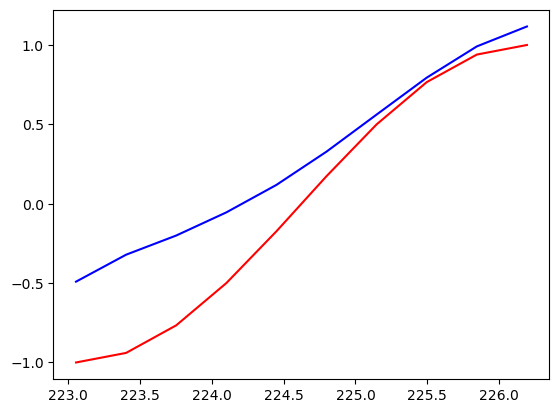

10


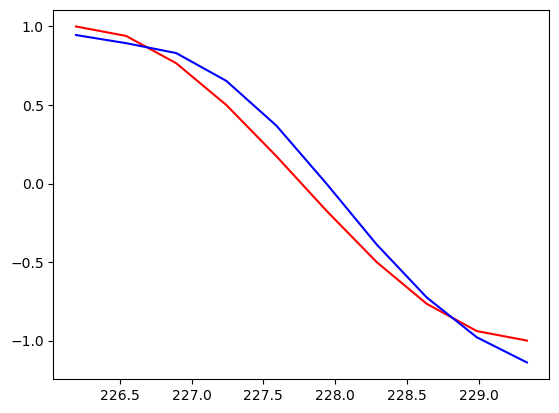

30


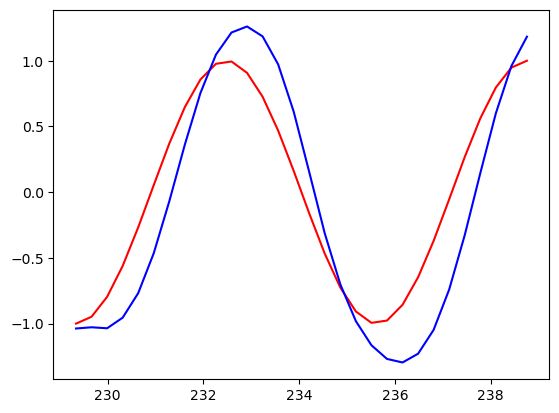

30


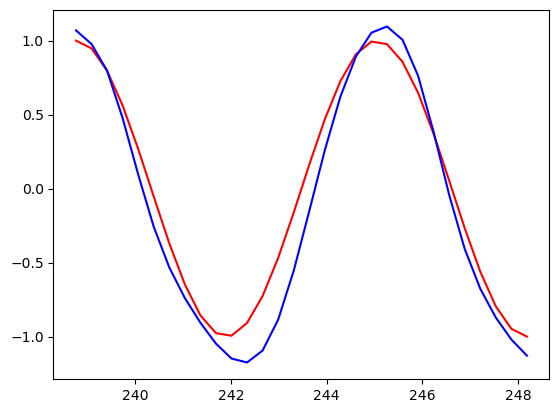

30


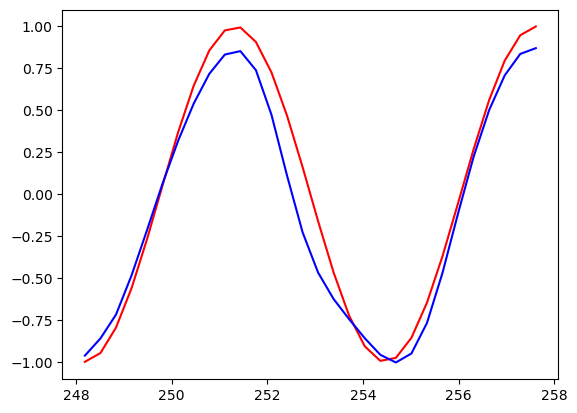

10


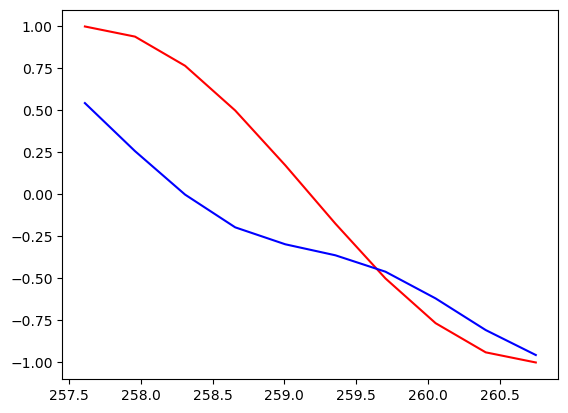

20


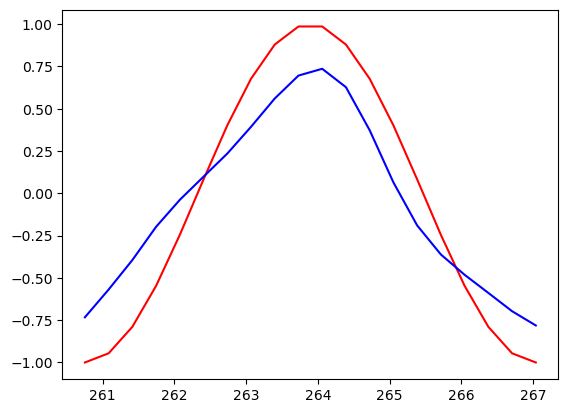

30


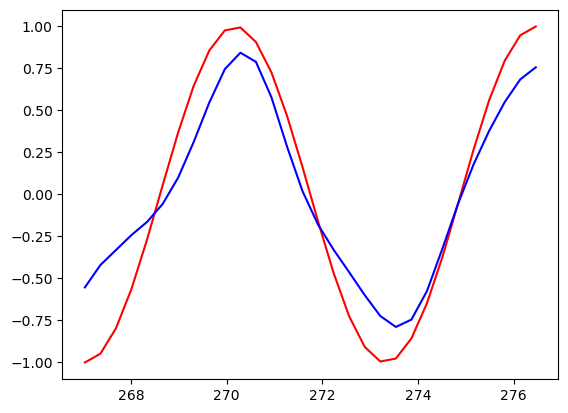

20


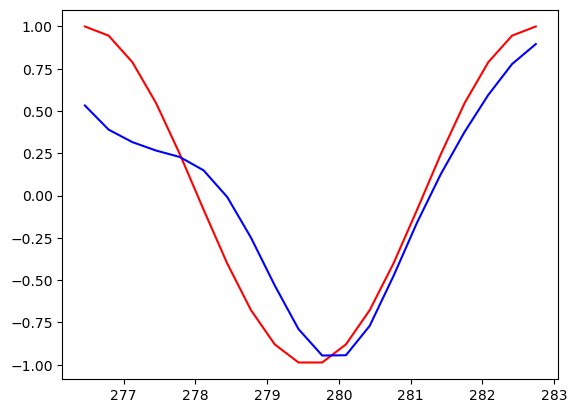

30


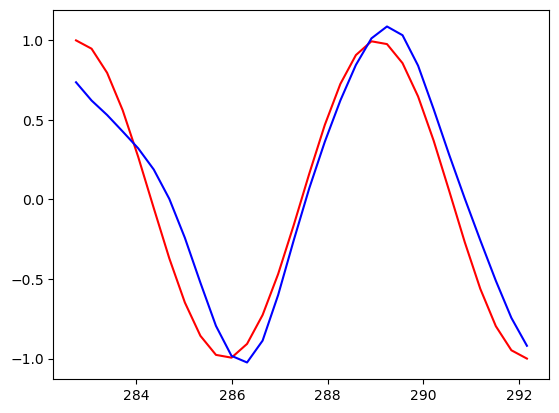

30


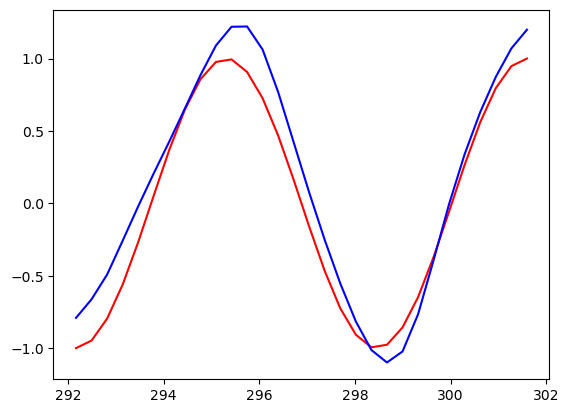

30


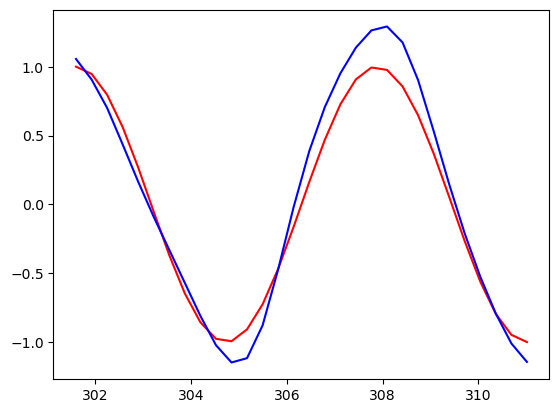

10


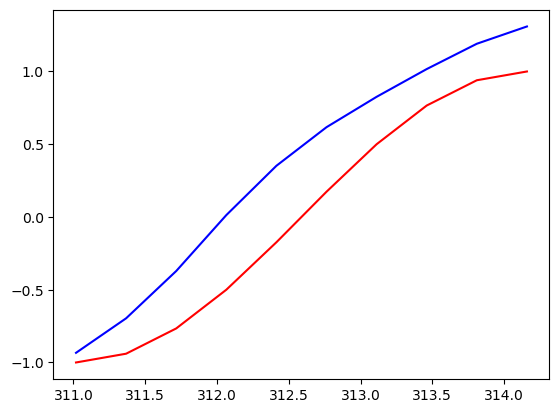

30


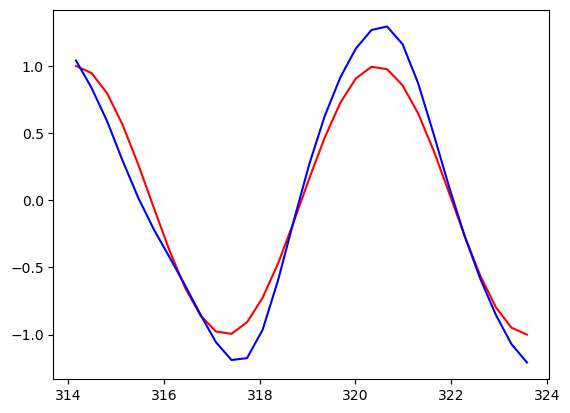

10


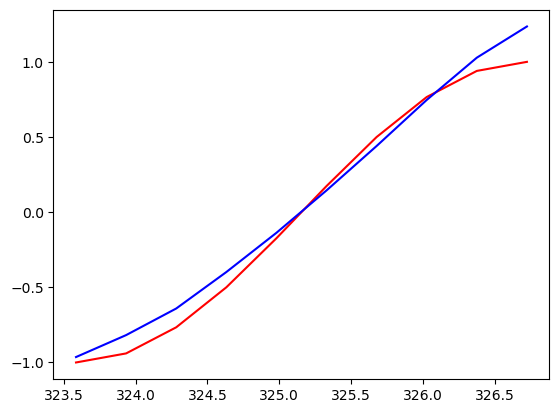

10


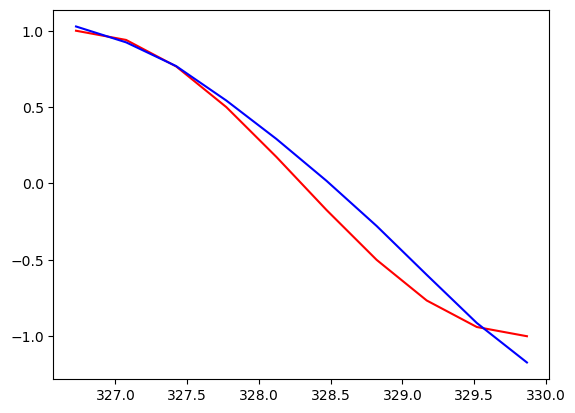

10


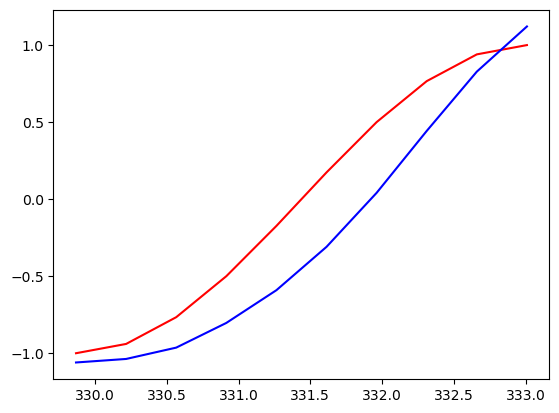

30


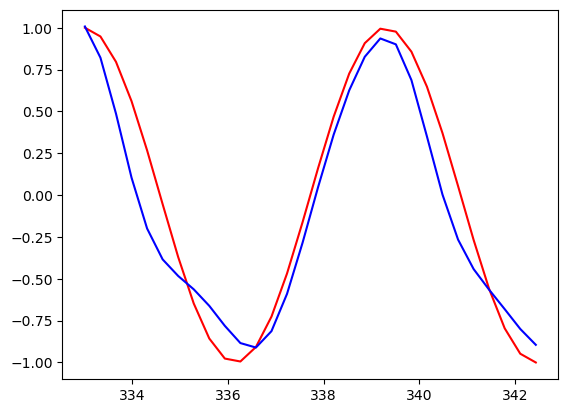

20


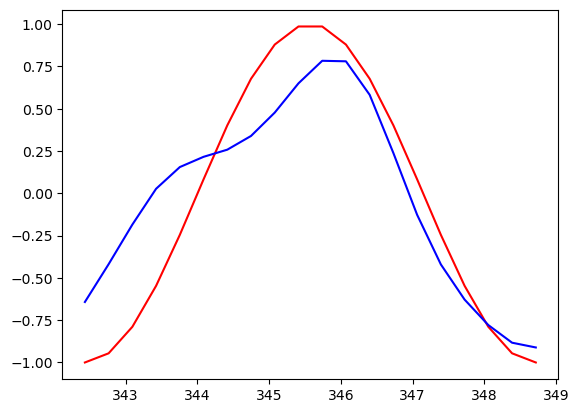

20


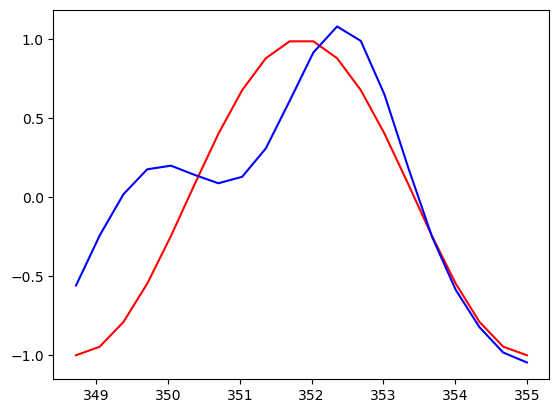

20


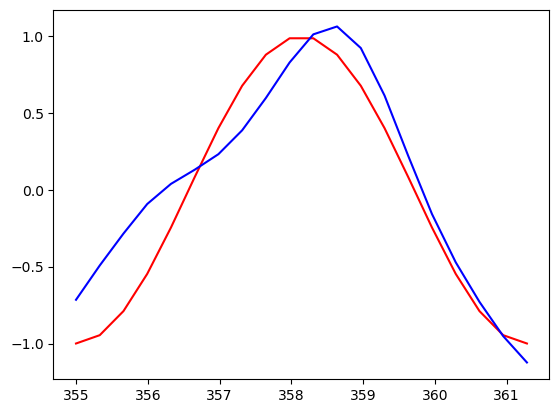

30


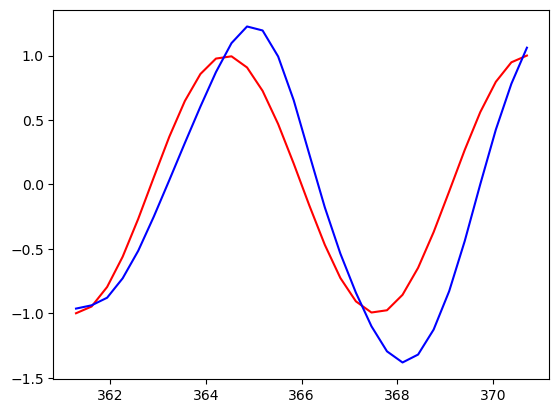

20


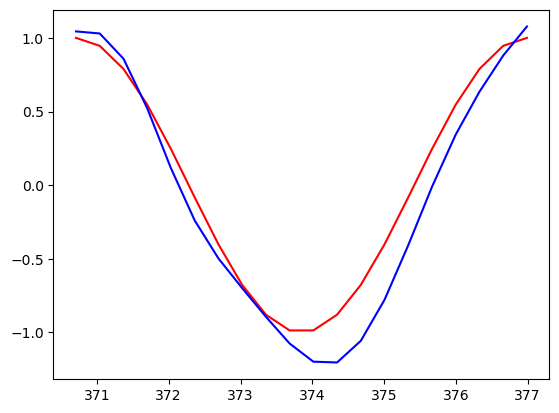

20


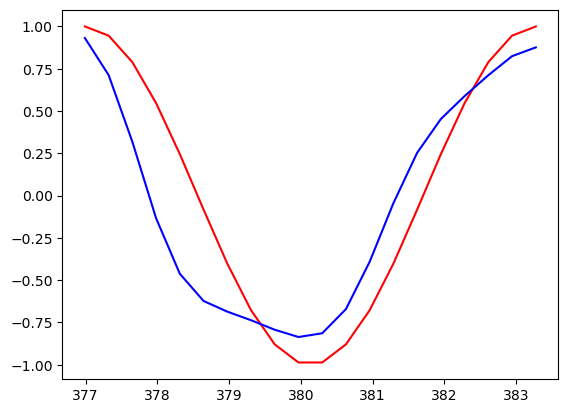

20


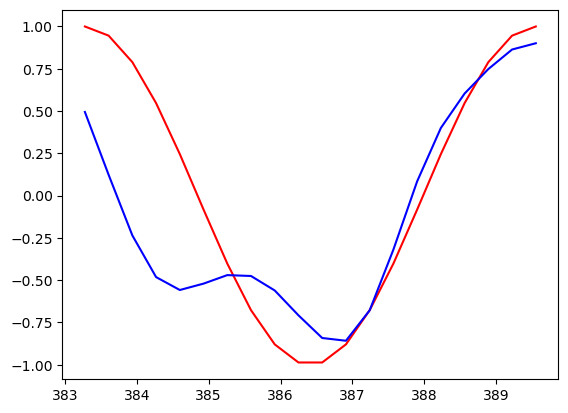

10


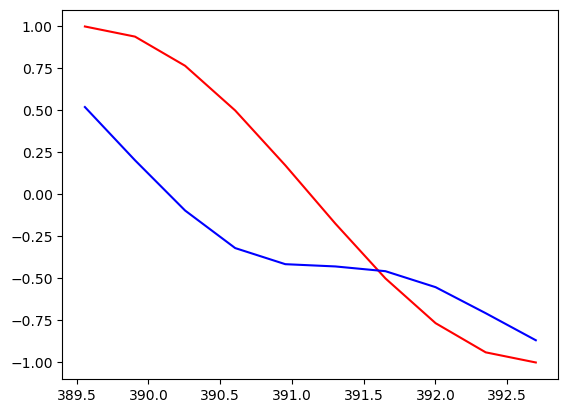

20


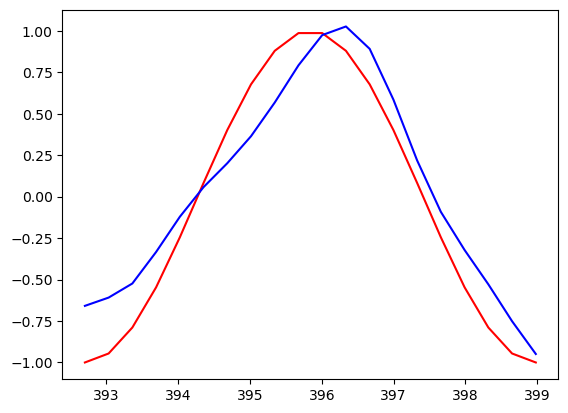

10


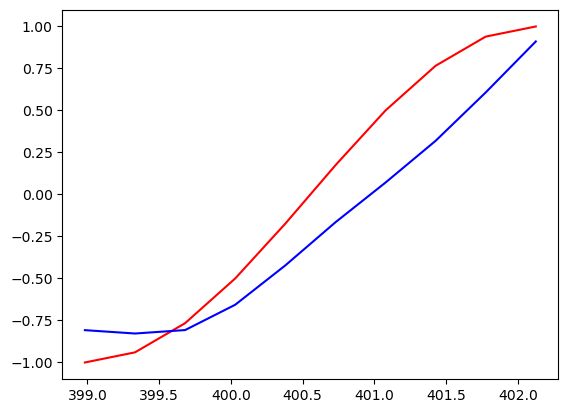

10


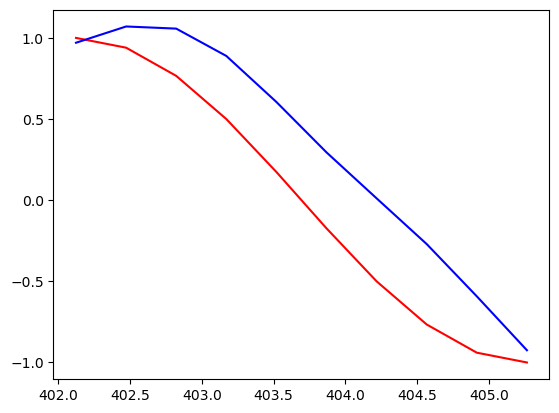

In [6]:
h_state = None    # for initial hidden state

plt.figure(1, figsize=(12, 5))
plt.ion()         # continously plot

############################ dynamic time steps ###############################
step = 0
for i in range(60):
    dynamic_steps = np.random.randint(1, 4)    # has random time steps
    start, end = step * np.pi, (step + dynamic_steps) * np.pi    # different time steps length
    step += dynamic_steps
    
    # use sin predicts cos
    steps = np.linspace(start, end, 10 * dynamic_steps, dtype=np.float32)
    
    #########################################################################
    
    print(len(steps))
    
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))
    
    prediction, h_state = rnn(x, h_state)
    h_state = Variable(h_state.data)
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    plt.pause(0.05)

plt.ioff()
plt.show()